# Parkinson disease classification

## 1. Data Preprocessing
> 1.1. Loading data <br /> 
> 1.2. Checking for missing values <br /> 
> 1.3. Outliers detection <br /> 
> 1.4. Basic data visulaizations <br /> 
>> 1.4.1. Correlation heatmap <br />
>> 1.4.2. Value counts <br />
>> 1.4.3. Skewness of features <br />
>
> 1.5. Log transform <br />

## 2. Modeling
> 2.1. Classifier selection <br />
> 2.2. Hyperparameters tuning <br />

## 1. Data Preprocessing

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from KamilMachineLearning import IQR_technique
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. Loading data

In [49]:
data = pd.read_csv("parkinsons.data")

# Moving labels column into the last spot as it is more convenience
temporary = data.status
data.drop(columns="status", inplace=True)
data = pd.concat([data, temporary], axis=1)

data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [50]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


### 1.2. Checking for missing values

In [51]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

### 1.3. Outliers detection
Outliers can have a significant effect on the whole process of predictions and data analysis, it is important to 
handle with them properly.

Firstly I decided to to visualize them on boxplots.

Then I decided to use the Tukey fences technique, which is based on interquartile range (IQR)

Text(0.5, 0.98, 'Boxplots to visualize outliers')

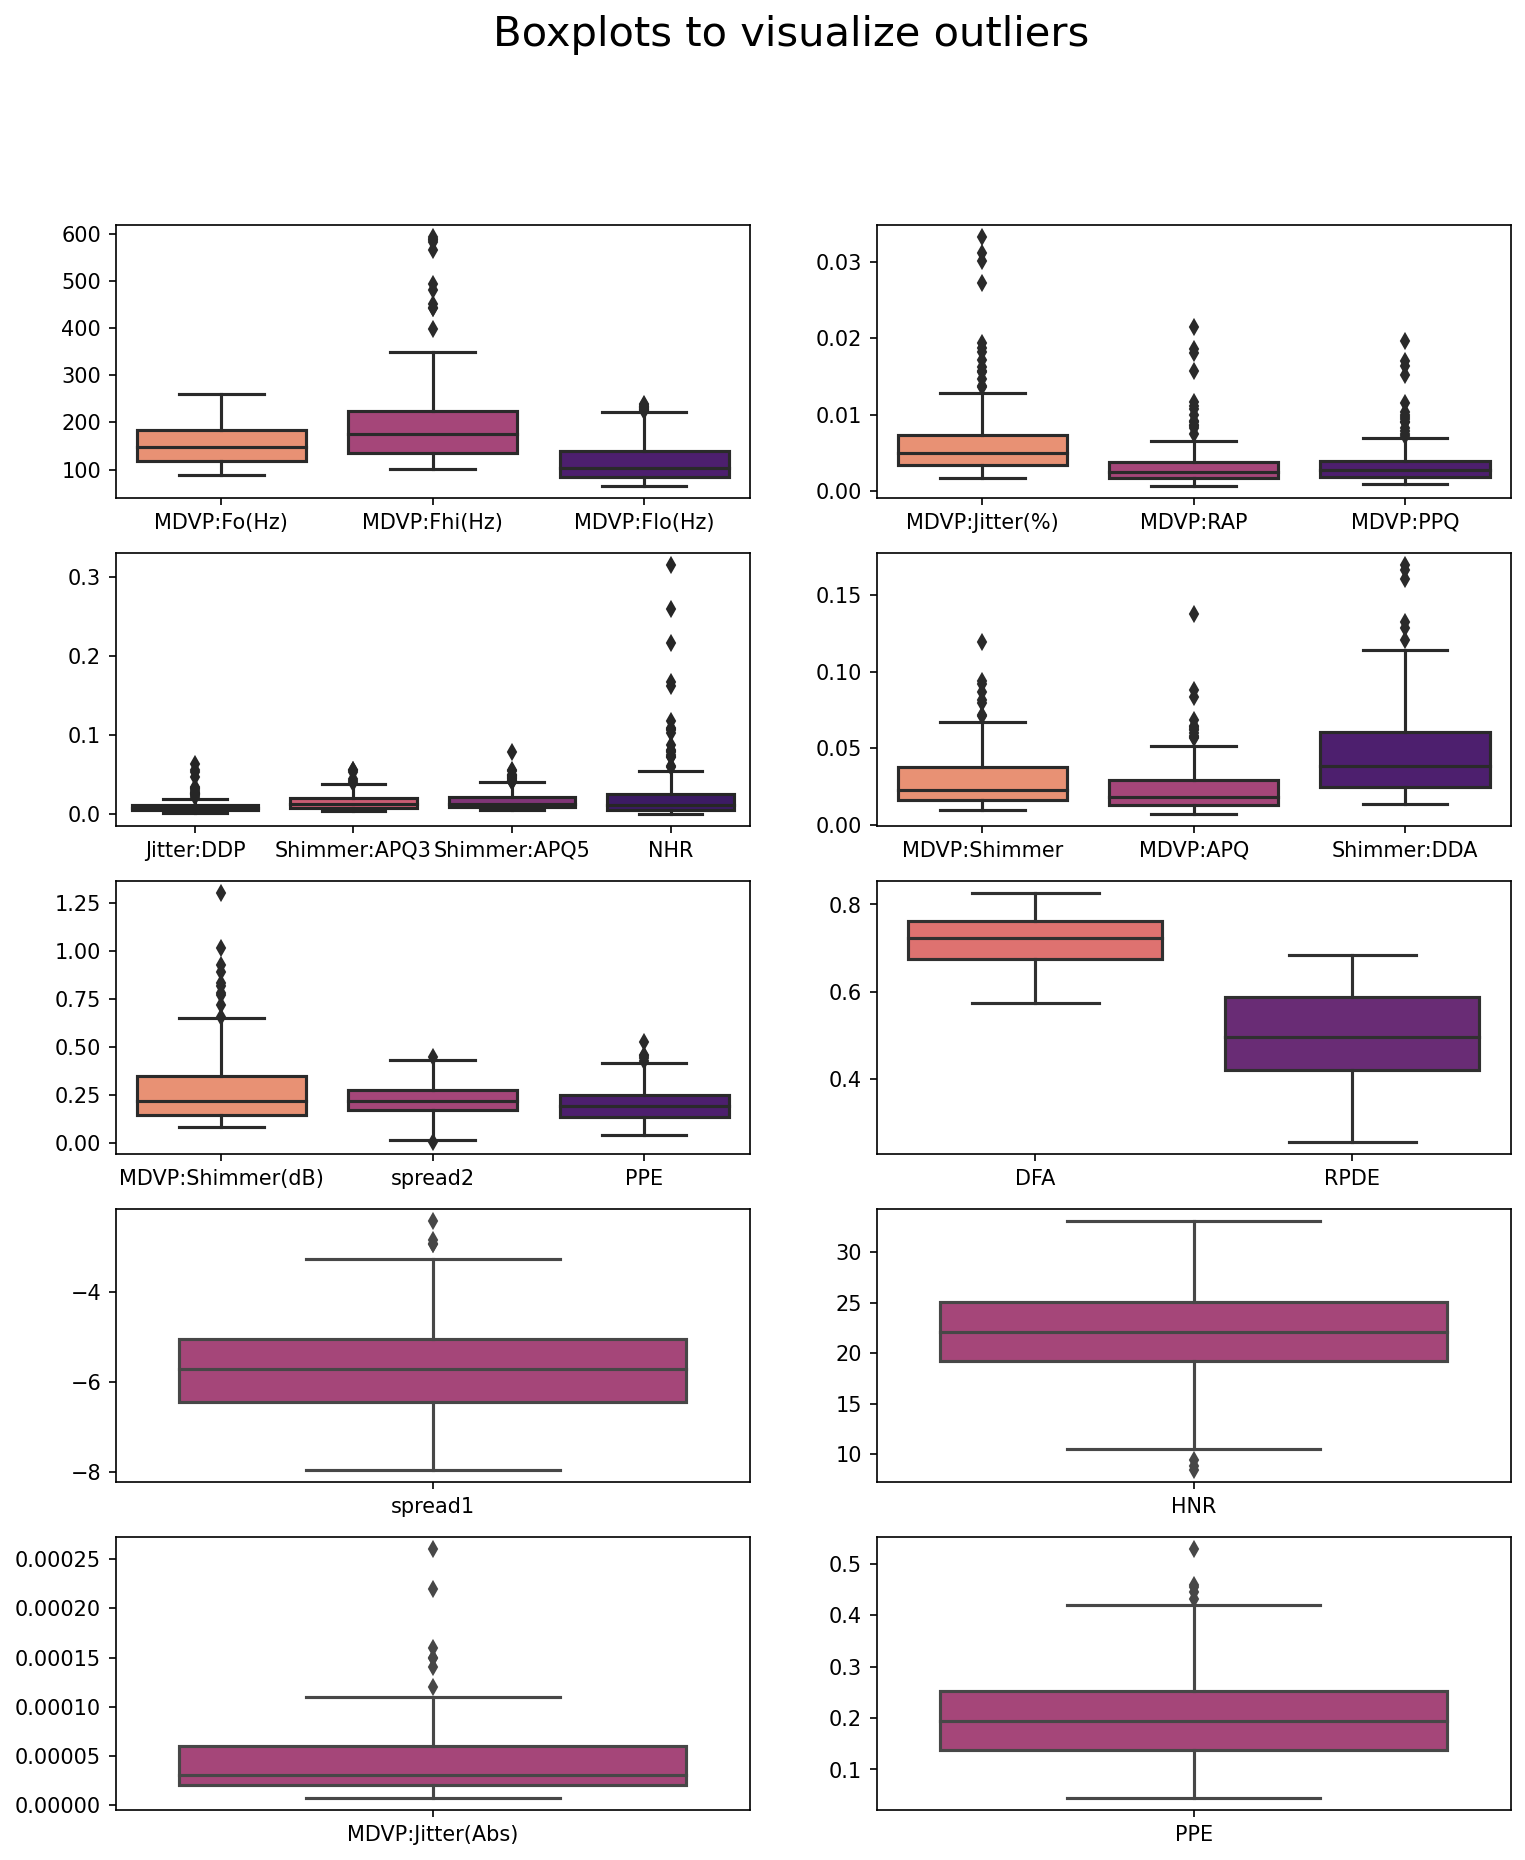

In [52]:
plt.figure(dpi=150, figsize=(12,14))

# Due to different ranges of the values for each feature I hard-coded them into each subplot for a good visualization

plt.subplot(5,2,1)
sns.boxplot(data=data[data.columns[0:4]], palette="magma_r")

plt.subplot(5,2,2)
sns.boxplot(data=data[["MDVP:Jitter(%)", "MDVP:RAP", "MDVP:PPQ"]], palette="magma_r")

plt.subplot(5,2,3)
sns.boxplot(data=data[["Jitter:DDP", "Shimmer:APQ3", "Shimmer:APQ5", "NHR"]], palette="magma_r")

plt.subplot(5,2,4)
sns.boxplot(data=data[["MDVP:Shimmer", "MDVP:APQ", "Shimmer:DDA"]], palette="magma_r")

plt.subplot(5,2,5)
sns.boxplot(data=data[["MDVP:Shimmer(dB)","spread2","PPE"]], palette="magma_r")

plt.subplot(5,2,6)
sns.boxplot(data=data[["DFA", "RPDE"]], palette="magma_r")

plt.subplot(5,2,7)
sns.boxplot(data=data[["spread1"]], palette="magma_r")

plt.subplot(5,2,8)
sns.boxplot(data=data[["HNR"]], palette="magma_r")

plt.subplot(5,2,9)
sns.boxplot(data=data[["MDVP:Jitter(Abs)"]], palette="magma_r")

plt.subplot(5,2,10)
sns.boxplot(data=data[["PPE"]], palette="magma_r")

plt.suptitle("Boxplots to visualize outliers", fontsize=20)

In [53]:
# Outliers are clearly visible, let's now use Tukey method to detect samples having multiple outliers

iqr = IQR_technique(data, 4, data.columns[1:23])
outliers_dict, multi_outliers = iqr.detect()

print(f"\nIndices with corrseponding amount of outliers:\n {outliers_dict}")
print(f"\nSamples having more than {iqr.min_outliers_number} outliers: {multi_outliers}")

# Some samples have a lot of outliers in different features, although as we are facing medical data, it is not so obvious
# to drop them off. Anyway it is nice to have them detected


Indices with corrseponding amount of outliers:
 Counter({151: 16, 152: 15, 102: 14, 100: 13, 149: 10, 146: 10, 148: 9, 99: 8, 150: 7, 101: 6, 147: 6, 157: 6, 91: 6, 98: 4, 97: 3, 115: 2, 193: 2, 192: 2, 4: 2, 141: 2, 90: 2, 89: 2, 17: 2, 73: 1, 116: 1, 117: 1, 118: 1, 120: 1, 186: 1, 187: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 63: 1, 166: 1, 167: 1, 170: 1, 2: 1, 5: 1, 1: 1, 87: 1, 88: 1, 18: 1, 164: 1, 65: 1})

Samples having more than 4 outliers: [102, 149, 99, 100, 101, 146, 147, 148, 150, 151, 152, 157, 91]


### 1.4. Basic data visualizations

1.4.1. Correlation Heatmap

Text(0.5, 1.0, 'Correlation heatmap')

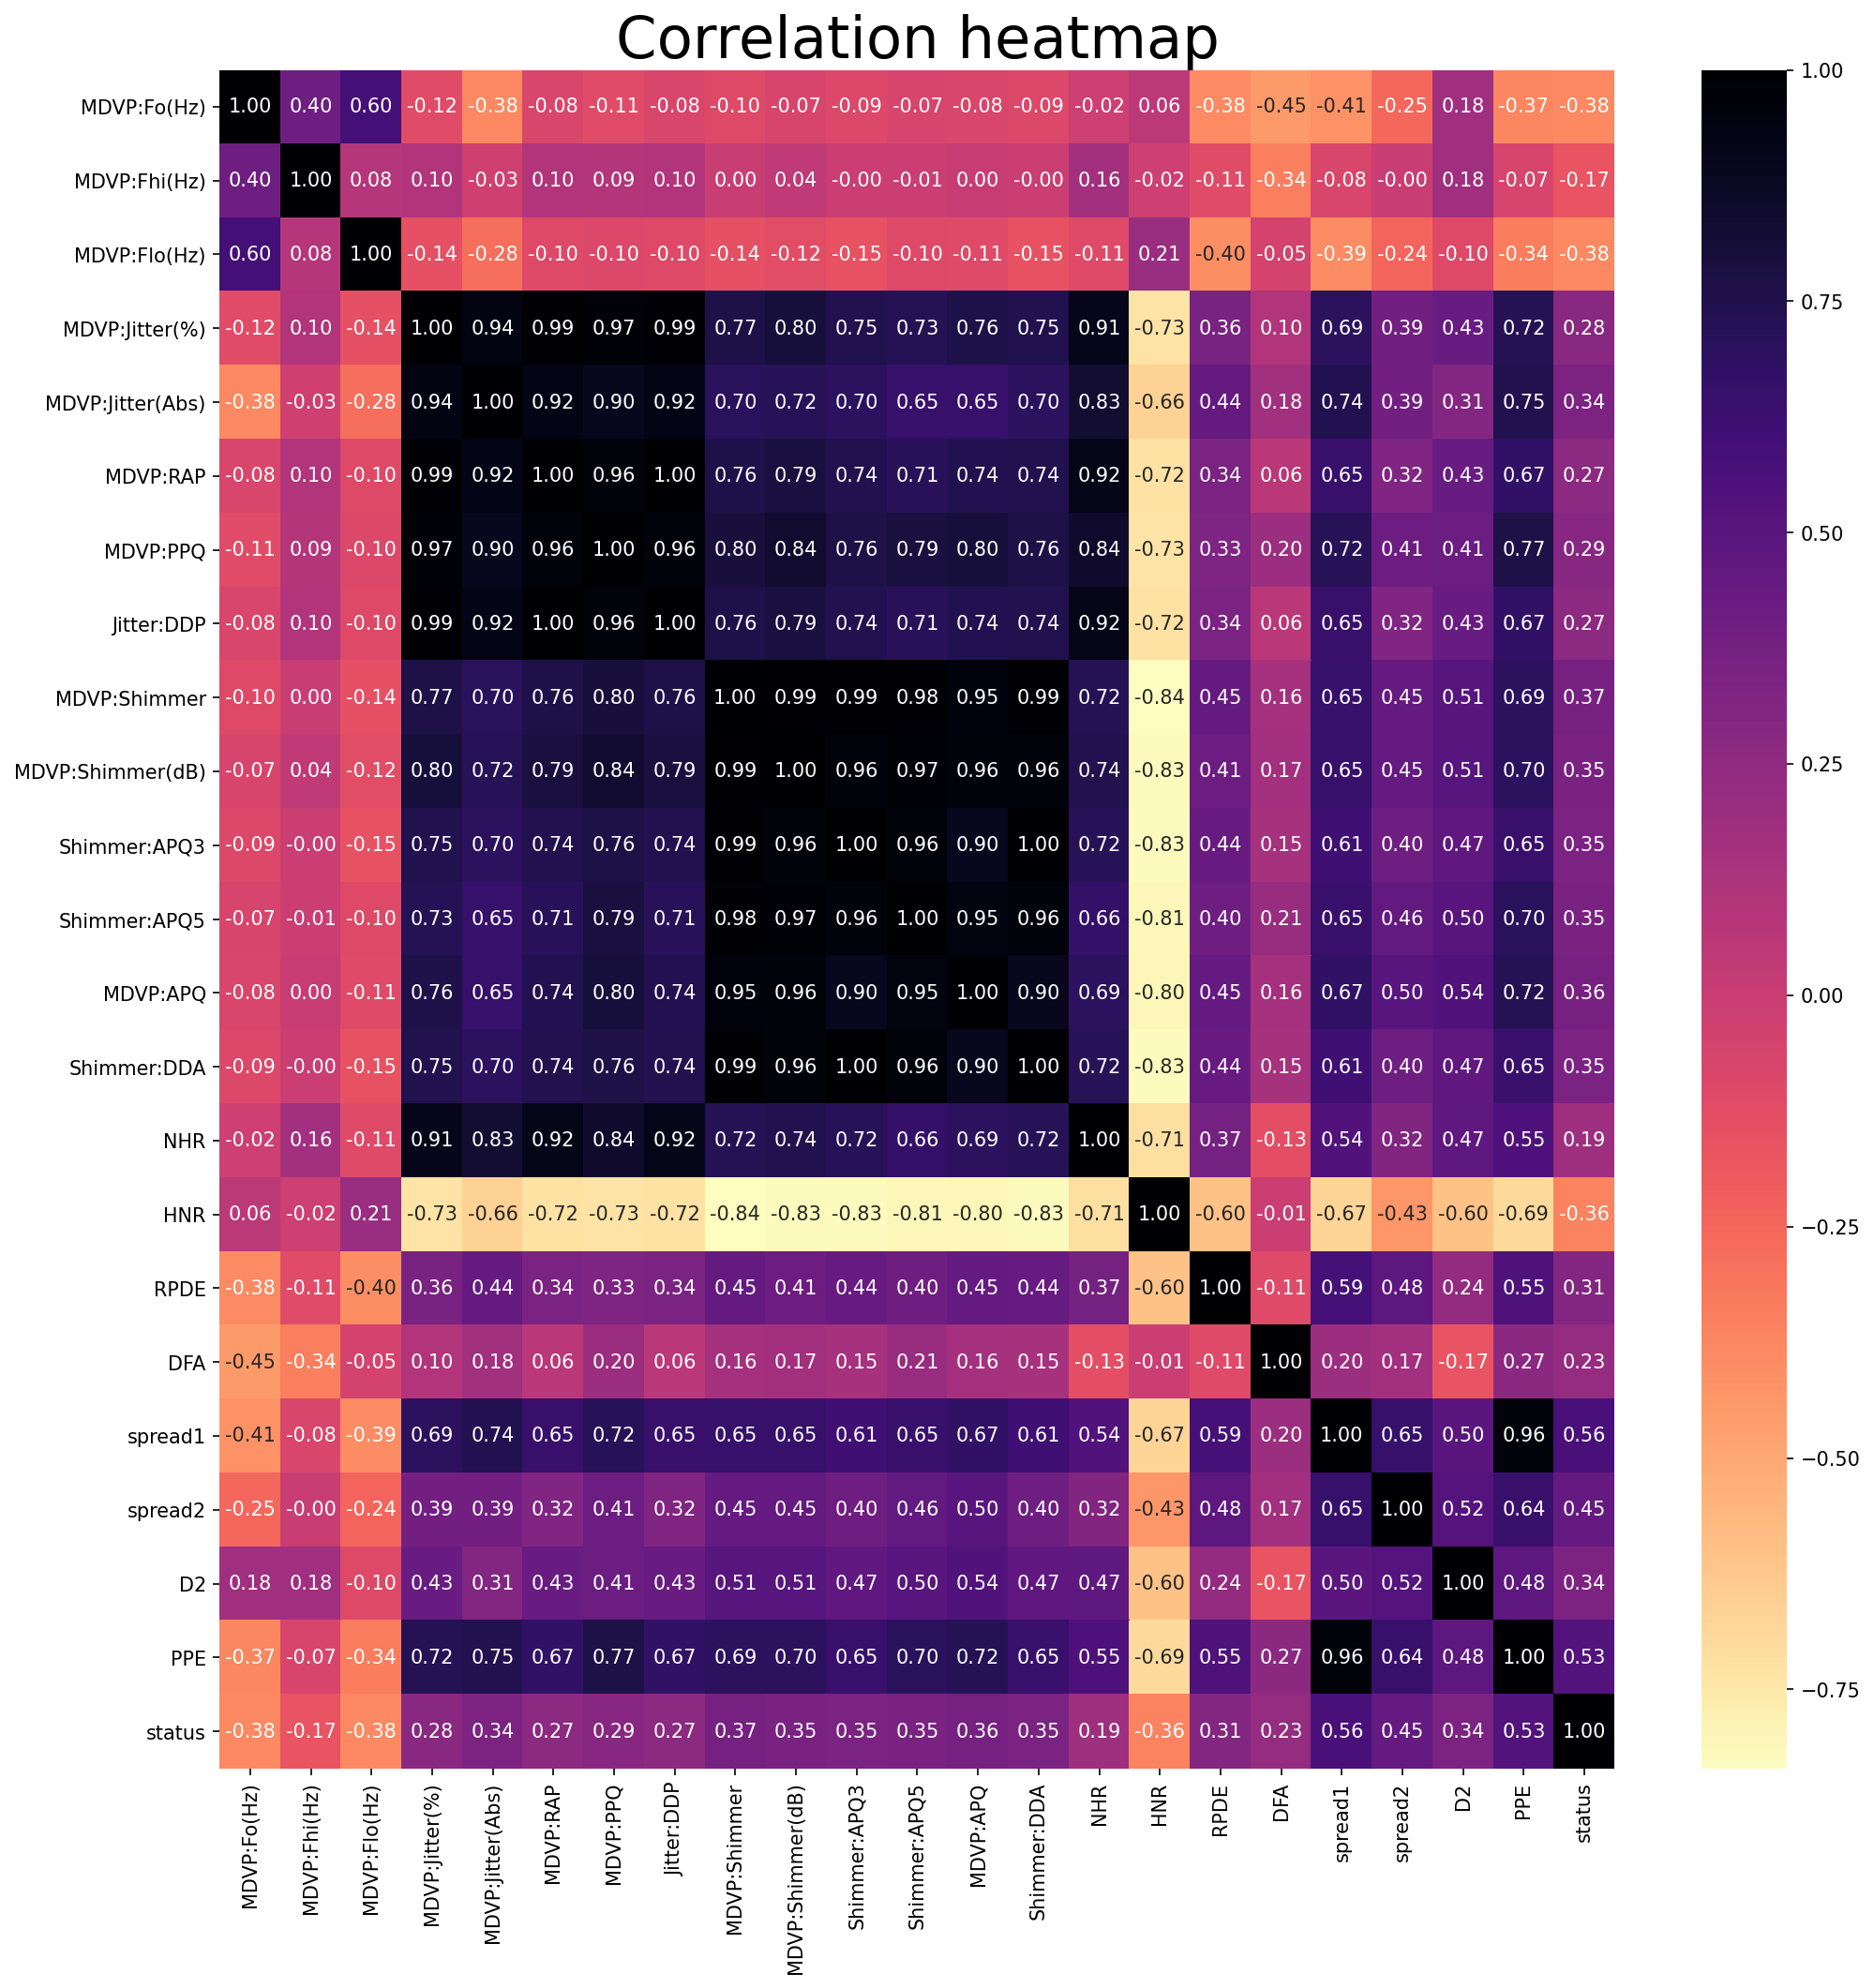

In [54]:
plt.figure(dpi=150, figsize=(16,16))
sns.heatmap(data[data.columns[0:24]].corr(), annot=True, fmt=".2f", cmap="magma_r")
plt.title("Correlation heatmap", fontsize=30)

The main thing that should be intriguing us, is correlation between features and status-label.

The strongest correlation with status is detected for "spread1" and "PPE", but still they are not on super-high level
We can't deny status dependance on other features.

1.4.2. Class count

Text(0.5, 1.0, 'Class count')

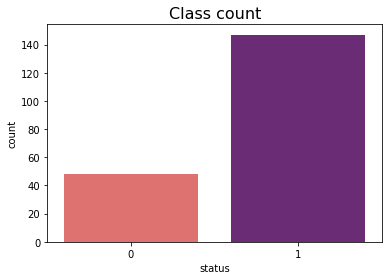

In [55]:
plt.figure()
sns.countplot(data["status"], palette="magma_r")
plt.title("Class count", fontsize=16)

1.4.3. Skewness of features

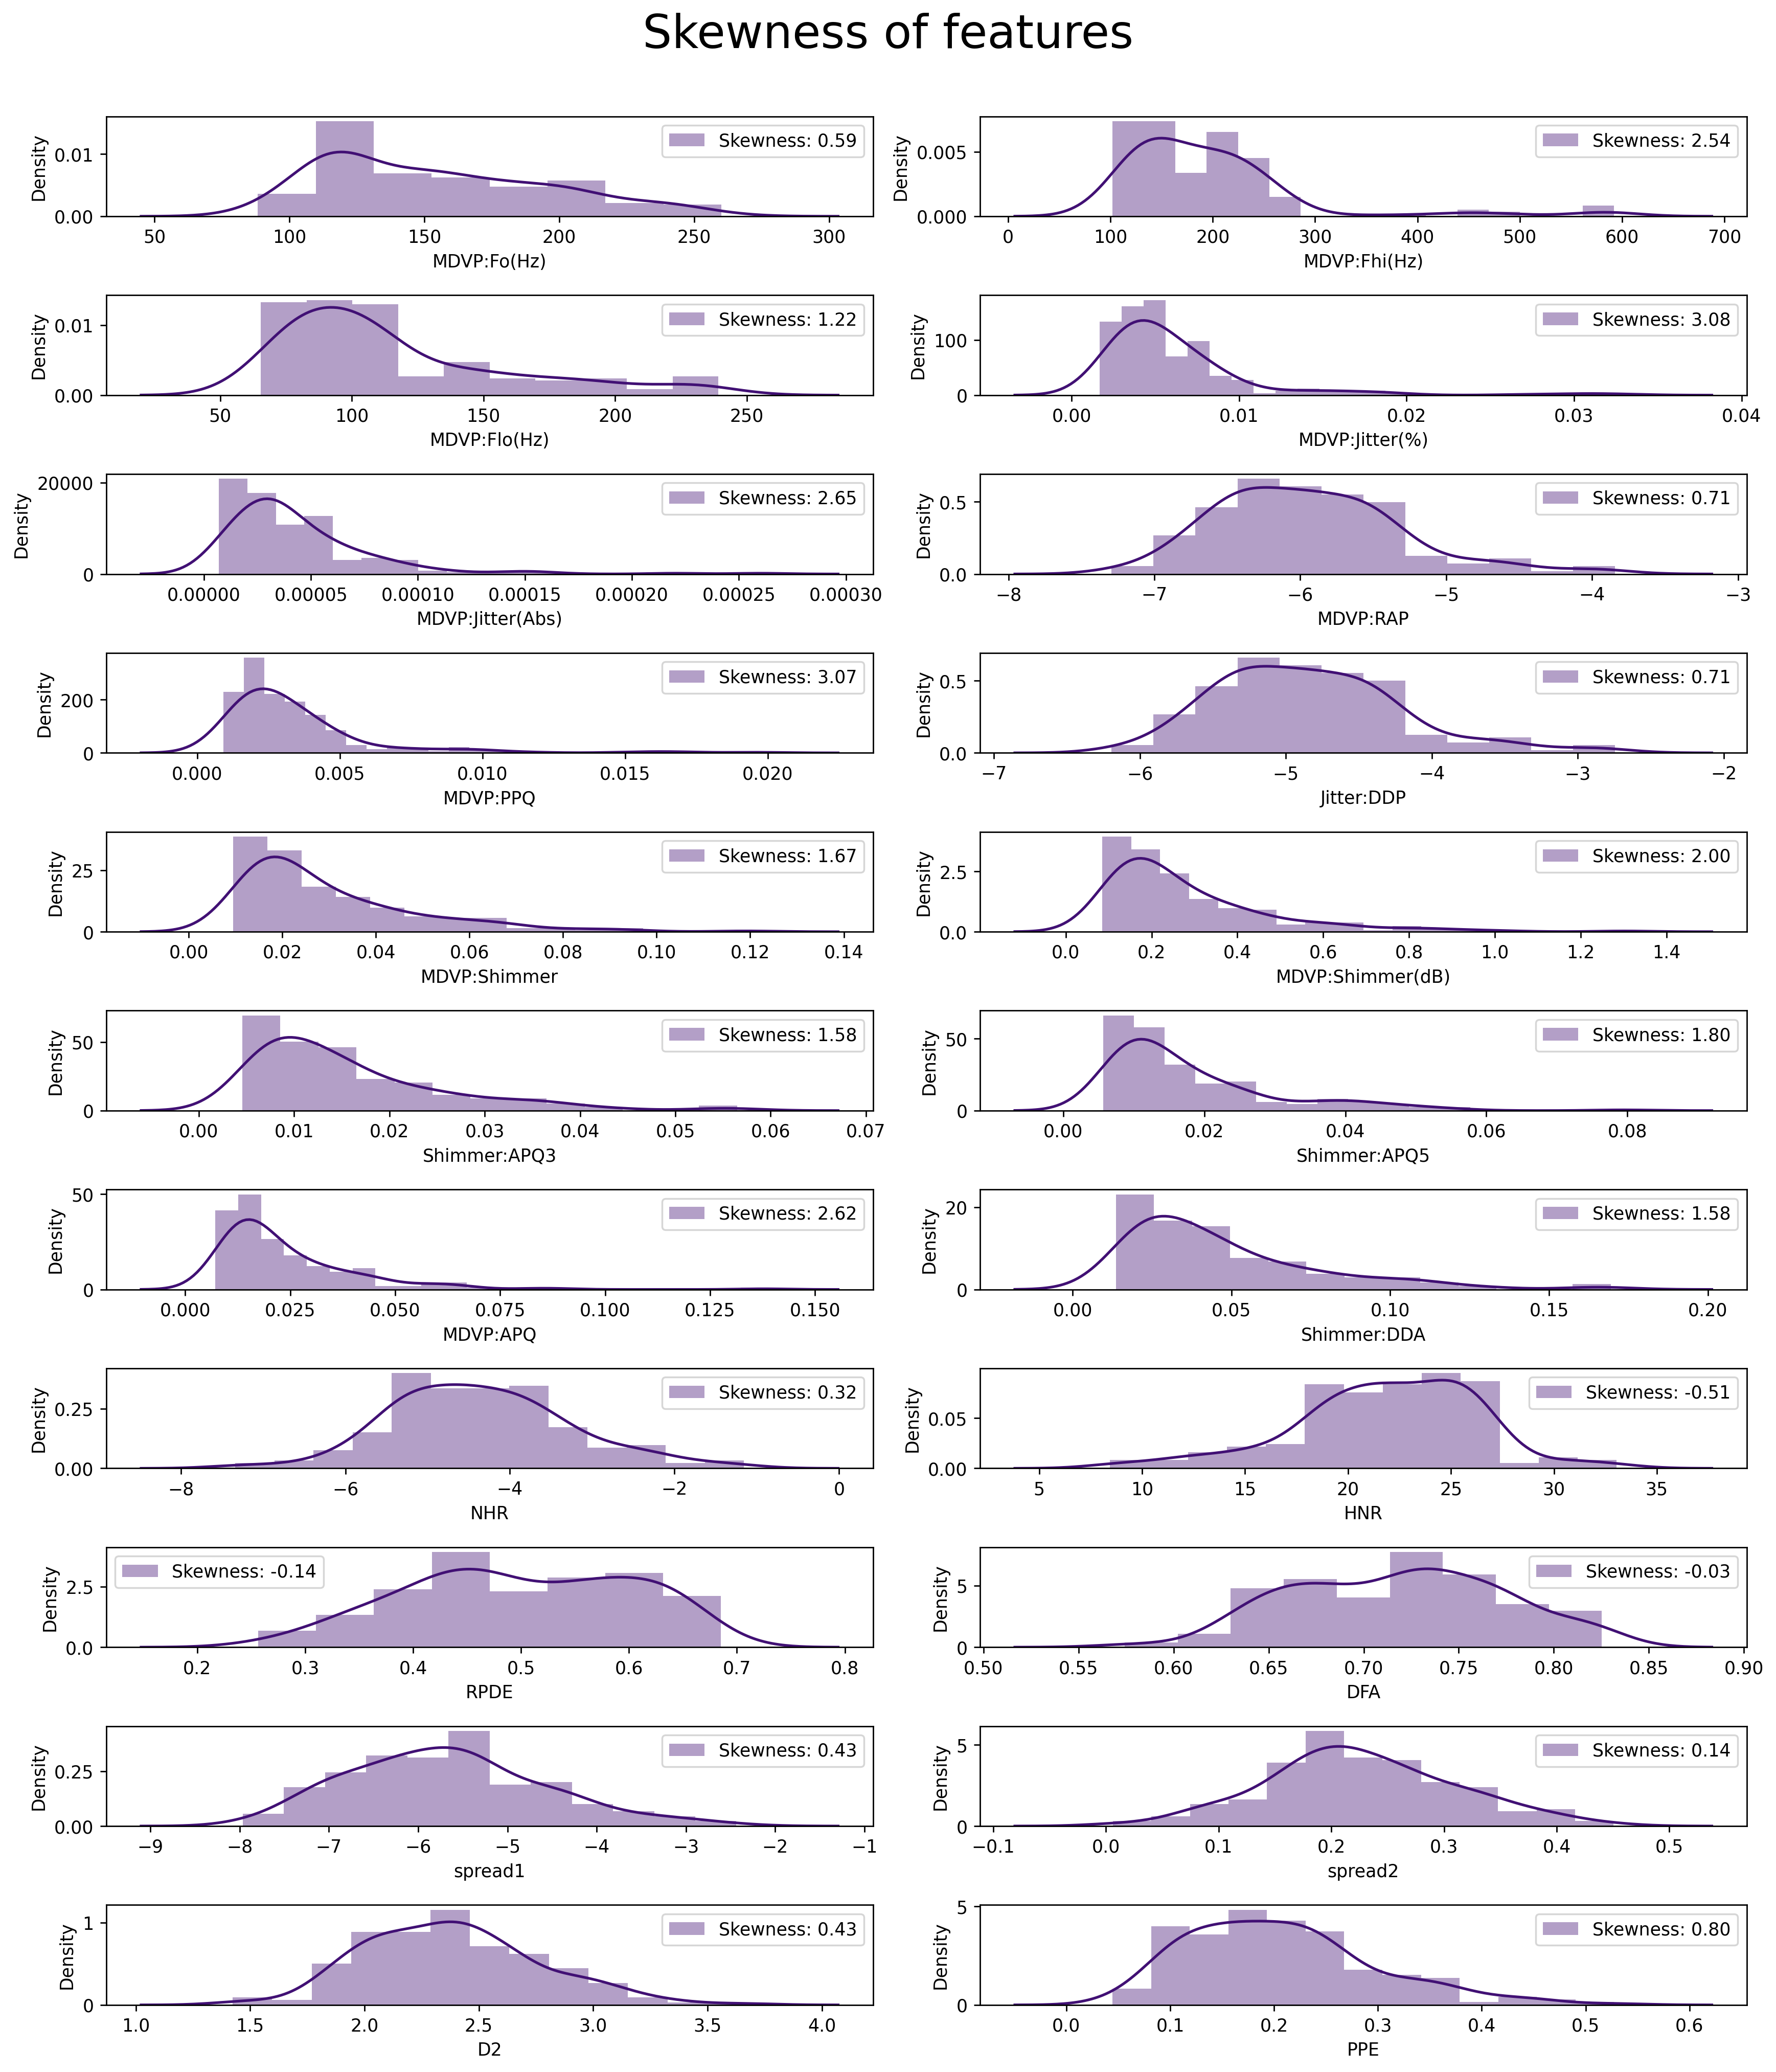

In [59]:
skewness = [data[feature].skew() for feature in data.columns[1:23]]

plt.figure(figsize=(14,16), dpi=250)
for i, skew, feature in zip(range(1,23), skewness, data.columns[1:23]):
    plt.subplot(11,2,i)
    sns.distplot(data[feature], color="#411074", label="Skewness: %.2f"%(skew))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.suptitle("Skewness of features", fontsize=26, y=1.01)

### 1.5. Log transformation

Performing log transform on the mostly skewed features along the dataset
For the statistical model the tail region may act as an outlier, so instead of dropping samples having outliers as mentioned before, I decided to perform log transform on those with the highest skewness

In [57]:
skewed_feature = data.columns[[skewness.index(i)+1 for i in skewness if i > 3.3]] # +1 as there is still 'name' feature
skewed_feature

Index(['MDVP:RAP', 'Jitter:DDP', 'NHR'], dtype='object')

Text(0.51, 1.15, 'Log transform')

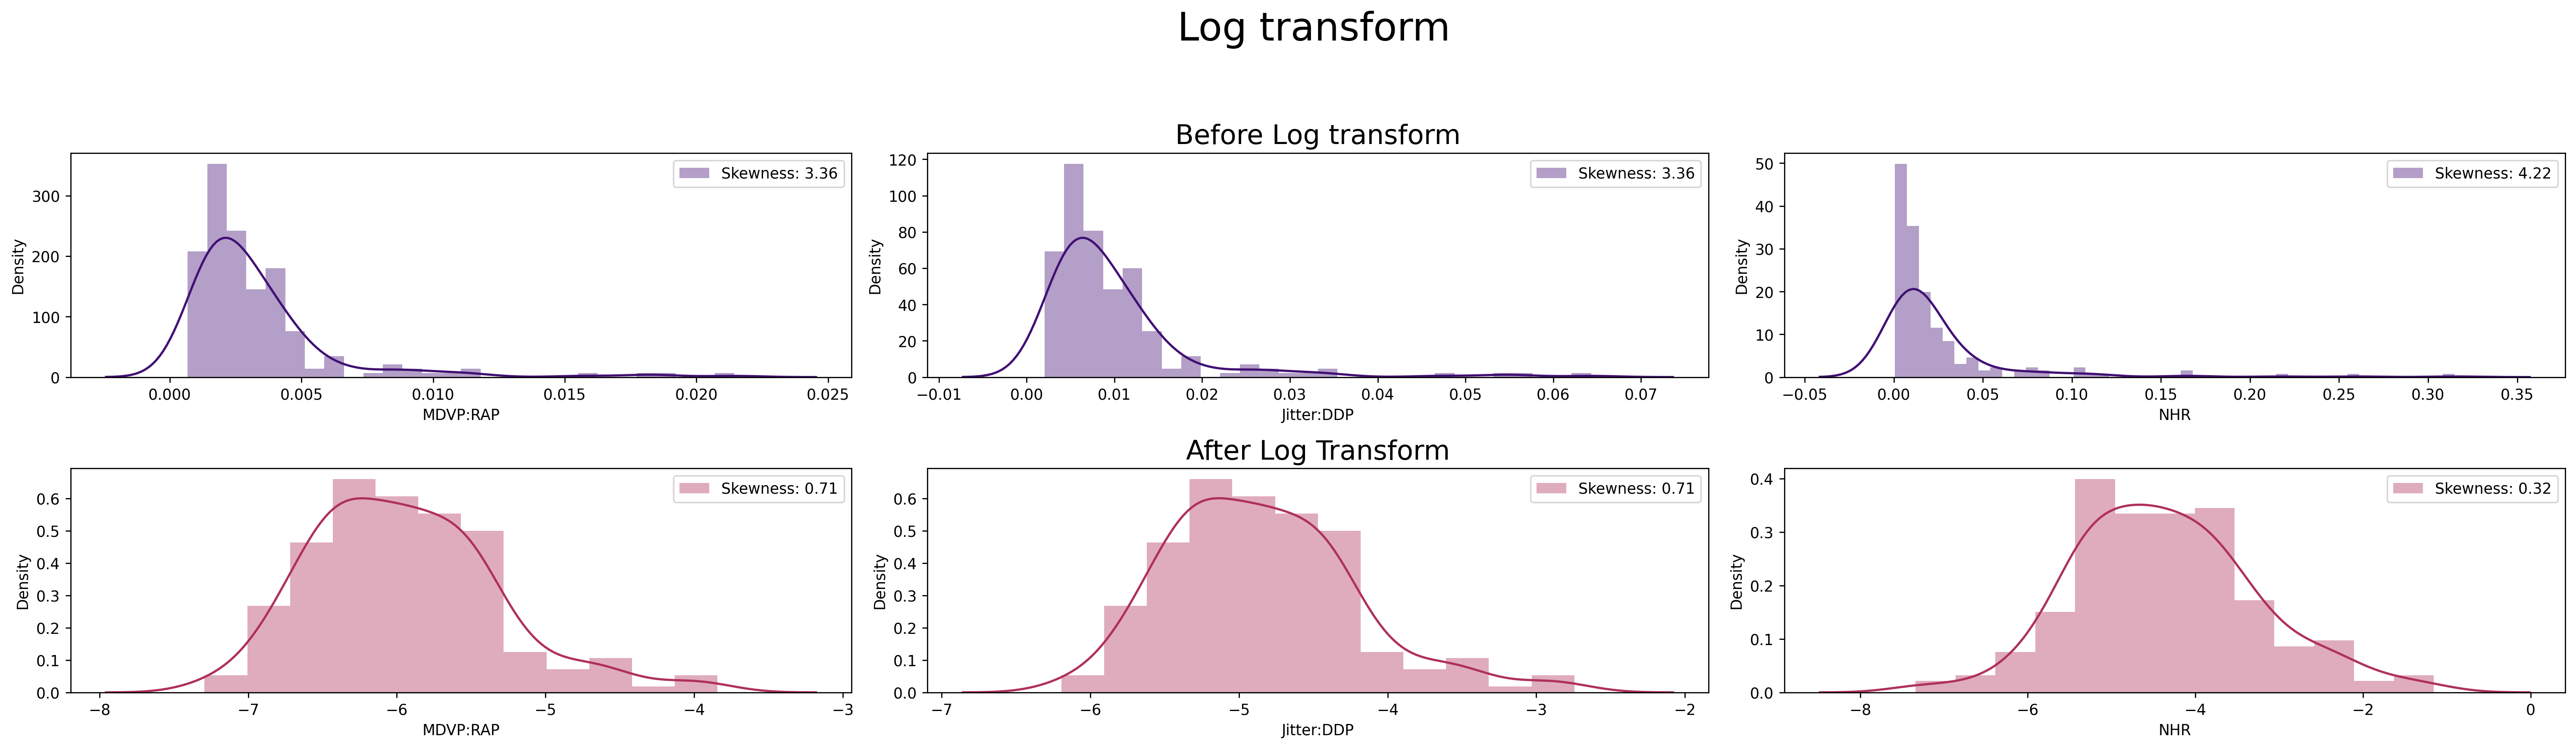

In [58]:
plt.figure(dpi=250, figsize=(24, 6))
plt.subplot(2,3,1)
sns.distplot(data["MDVP:RAP"], color="#411074", label="Skewness: %.2f"%(skewness[5]))
plt.legend(loc="best")
plt.tight_layout()

plt.subplot(2,3,2)
sns.distplot(data["Jitter:DDP"], color="#411074", label="Skewness: %.2f"%(skewness[7]))
plt.legend(loc="best")
plt.tight_layout()
plt.title("Before Log transform", fontsize=18)

plt.subplot(2,3,3)
sns.distplot(data["NHR"], color="#411074", label="Skewness: %.2f"%(skewness[14]))
plt.legend(loc="best")
plt.tight_layout()


data["MDVP:RAP"] = data["MDVP:RAP"].map(lambda x: np.log(x))
data["Jitter:DDP"] = data["Jitter:DDP"].map(lambda x: np.log(x))
data["NHR"] = data["NHR"].map(lambda x: np.log(x))


plt.subplot(2,3,4)
sns.distplot(data["MDVP:RAP"], color="#af315b", label="Skewness: %.2f"%(data["MDVP:RAP"].skew()))
plt.legend(loc="best")
plt.tight_layout()

plt.subplot(2,3,5)
sns.distplot(data["Jitter:DDP"] , color="#af315b", label="Skewness: %.2f"%(data["Jitter:DDP"].skew()))
plt.legend(loc="best")
plt.tight_layout()
plt.title("After Log Transform", fontsize=18)

plt.subplot(2,3,6)
sns.distplot(data["NHR"], color="#af315b", label="Skewness: %.2f"%(data["NHR"].skew()))
plt.legend(loc="best")
plt.tight_layout()

plt.suptitle("Log transform", fontsize=26, y =1.15, x=0.51)

### 1.6. Train and test set ##

In [60]:
X = data.drop(["name", "status"], axis=1)
y = data["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, shuffle=True, random_state=1, stratify=y)

## 2. Modeling

### 2.1. Classifier selection

In [62]:
# Decided to go for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

tree = DecisionTreeClassifier(criterion="gini", random_state=1)

### 2.2. Hyperparameters tuning

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

2.2.1. Nested Cross-validation

Decided to perform both tuning and validating with a 10x2 Nested Cross Validation technique

In [64]:
kfold_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # learning
kfold_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # hyperparams tuning

In [104]:
params = {"max_depth": list(range(3,10)), "max_features": list(range(1,23))}

In [105]:
searching = RandomizedSearchCV(tree, params, cv=kfold_inner, scoring="accuracy", n_iter=60)
scores = cross_val_score(searching, X_train, y_train, cv=kfold_outer, scoring="accuracy")
print('Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy: 0.855 +/- 0.073


In [106]:
searching.fit(X_train, y_train)
searching.best_params_

{'max_features': 1, 'max_depth': 5}

In [107]:
searching.best_score_

0.8727272727272727